precision aimed: 5.000000 kHz
real hfsbar:  1420000  measured hfsbar:  1420006.5984496123
first order correction 6.4  in percentage: 128.0 %
second order correction 0.19844961240021294  in percentage: 4.0 %


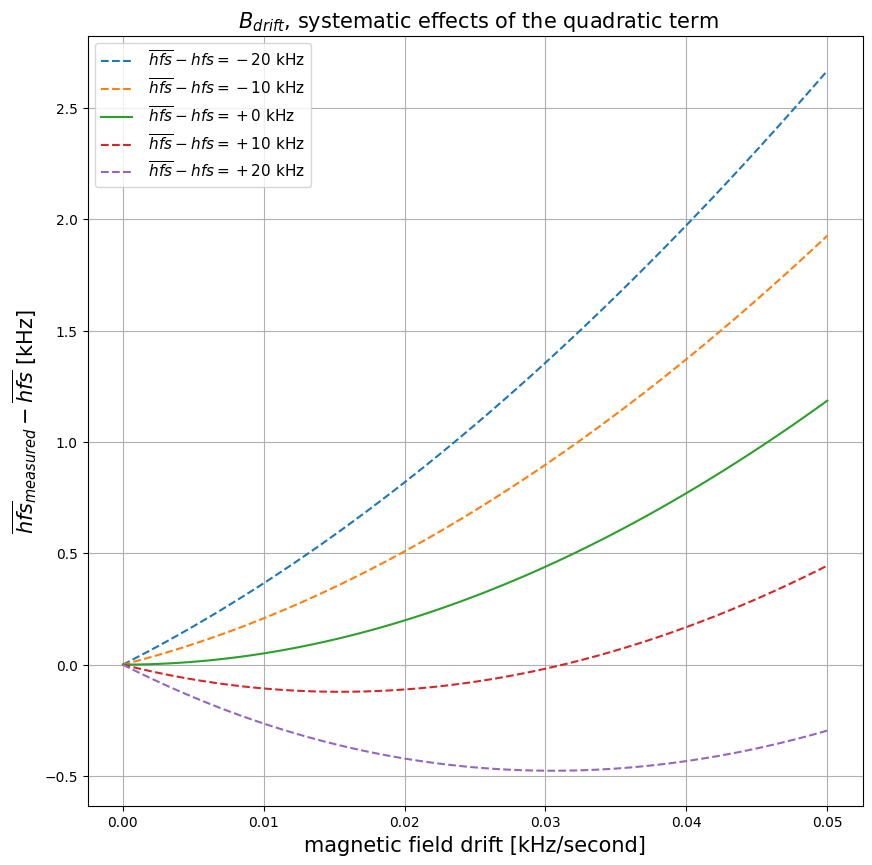

In [81]:
import numpy as np
from matplotlib import pyplot as plt

hfsbar = 1420000 # khz
distance = 1420000 #khz
tdwell = 8 # second
tsweep = (24 + 16)*tdwell # second
Bdrift = 0.02 # kHz/second
fstep = 5 # kHz

firstorder = tsweep*Bdrift
secondorder = Bdrift*(Bdrift*tsweep + distance - hfsbar)/(Bdrift + fstep/tdwell)


def MeasuredHFS(Bdrift):
    firstorder = tsweep*Bdrift
    firstorder = 0
    secondorder = - Bdrift*( -Bdrift*tsweep - distance + hfsbar)/(Bdrift + fstep/tdwell)
    return - firstorder + secondorder

aimedprecision = 5
print("precision aimed: %f kHz" % aimedprecision)
print("real hfsbar: ", hfsbar, " measured hfsbar: ", hfsbar + firstorder + secondorder)
print("first order correction", firstorder, " in percentage: %.1f %%" % (100*firstorder/aimedprecision))
print("second order correction", secondorder, " in percentage: %.1f %%" % (100*secondorder/aimedprecision))

plt.figure(0, figsize = (10,10))
plt.title(r" $B_{drift}$, systematic effects of the quadratic term", fontsize = 15)
plt.ylabel(r"$\overline{hfs}_{measured} - \overline{hfs}$ [kHz]", fontsize = 15)
plt.xlabel("magnetic field drift [kHz/second]", fontsize = 15)
plt.grid()
Bfield = np.linspace(0,0.05,100)
hfsbar = 1420000 - 20
plt.plot(Bfield, MeasuredHFS(Bfield), linestyle = "--", label = r" $\overline{hfs} - hfs = %d$ kHz" % (hfsbar - distance))
hfsbar = 1420000 - 10
plt.plot(Bfield, MeasuredHFS(Bfield), linestyle = "--", label = r" $\overline{hfs} - hfs = %d$ kHz" % (hfsbar - distance))
hfsbar = 1420000
plt.plot(Bfield, MeasuredHFS(Bfield), linestyle = "-", label = r" $\overline{hfs} - hfs = +%d$ kHz" % (hfsbar - distance))
hfsbar = 1420010
plt.plot(Bfield, MeasuredHFS(Bfield), linestyle = "--", label = r" $\overline{hfs} - hfs = +%d$ kHz" % (hfsbar - distance))
hfsbar = 1420020
plt.plot(Bfield, MeasuredHFS(Bfield), linestyle = "--", label = r" $\overline{hfs} - hfs = +%d$ kHz" % (hfsbar - distance))
plt.legend(fontsize = 11)
plt.savefig("Bdrift.pdf",bbox_inches= 'tight')



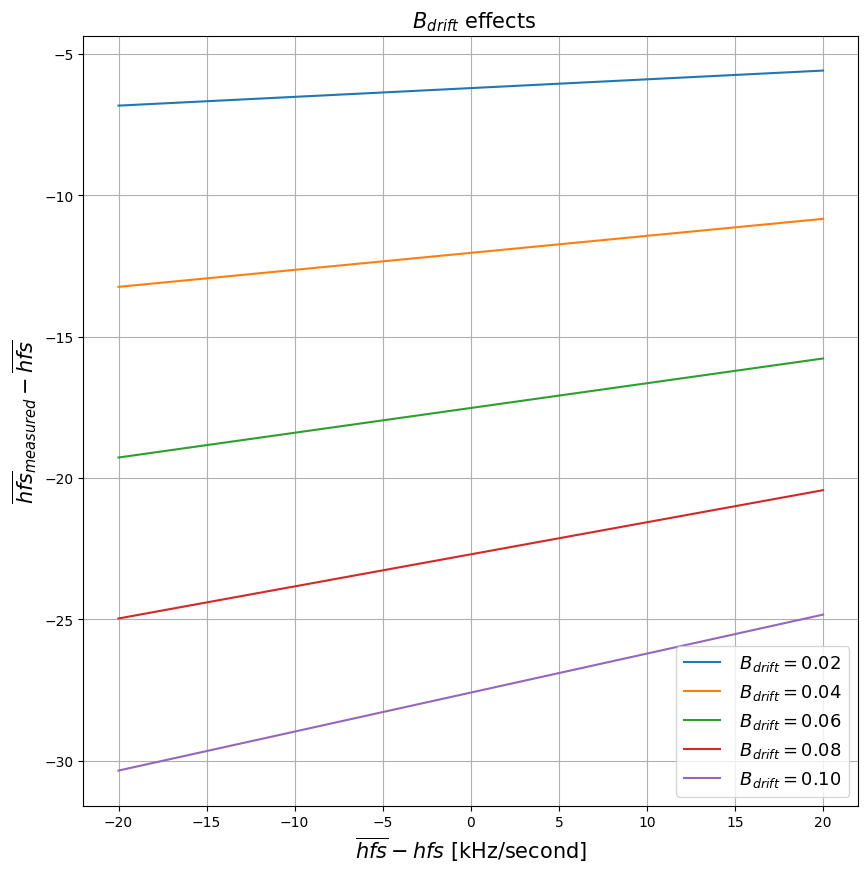

In [79]:
def MeasuredHFS(diff):
    firstorder = tsweep*Bdrift
    #firstorder = 0
    secondorder = Bdrift*(Bdrift*tsweep + diff)/(Bdrift + fstep/tdwell)
    return - firstorder + secondorder

plt.figure(1, figsize = (10,10))
plt.title(r" $B_{drift}$ effects", fontsize = 15)
plt.ylabel(r"$\overline{hfs}_{measured} - \overline{hfs}$", fontsize = 15)
plt.xlabel(r"$\overline{hfs} - hfs$ [kHz/second]", fontsize = 15)
plt.grid()
diff = np.linspace(-20,+20,100)
Bdrift = 0.02
plt.plot(diff, MeasuredHFS(diff), linestyle = "-", label = r" $B_{drift} = %.2f$" % (Bdrift))
Bdrift = 0.04
plt.plot(diff, MeasuredHFS(diff), linestyle = "-", label = r" $B_{drift} = %.2f$" % (Bdrift))
Bdrift = 0.06
plt.plot(diff, MeasuredHFS(diff), linestyle = "-", label = r" $B_{drift} = %.2f$" % (Bdrift))
Bdrift = 0.08
plt.plot(diff, MeasuredHFS(diff), linestyle = "-", label = r" $B_{drift} = %.2f$" % (Bdrift))
Bdrift = 0.1
plt.plot(diff, MeasuredHFS(diff), linestyle = "-",  label = r" $B_{drift} = %.2f$" % (Bdrift))
plt.legend(fontsize = 13)
#plt.savefig("Bdrift2.pdf",bbox_inches= 'tight')